# creating models

In [98]:
import numpy as np 
import matplotlib.pyplot as plt 
import torch 
import pandas as pd
 
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [99]:
indf = pd.read_excel('data/clean/indf.xlsx').drop('Unnamed: 0', axis=1)
outdf = pd.read_excel('data/clean/outdf.xlsx').drop('Unnamed: 0', axis=1)

TEST_SPLIT = int(0.85 * len(indf))
X_train, y_train, X_test, y_test = indf.iloc[:TEST_SPLIT], outdf.iloc[:TEST_SPLIT], indf.iloc[TEST_SPLIT:], outdf.iloc[TEST_SPLIT:]
len(X_train), len(X_test), len(indf)

(9805, 1731, 11536)

In [100]:
indf

,Series date,Length Overall,Maximum Beam,Draft,Displacement,DLR,IMS Division,Dynamic Allowance,Age Allowance,Mainsail measured,...,Mizzen measured,Mizzen rated,Headsail Flying measured,Headsail Flying rated,Asymmetric measured,Asymmetric rated,Quad. Mainsail measured,Quad. Mainsail rated,Mizzen Staysail measured,Mizzen Staysail rated
0,0.926917,0.129929,0.092691,0.166967,0.012646,0.198474,0.666667,0.200000,1.000000,0.049676,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
1,0.880755,0.139393,0.102733,0.062528,0.019525,0.406542,0.000000,0.800000,1.000000,0.031359,...,0.056285,0.056638,0.050080,0.148463,0.032390,0.135318,0.0,0.0,0.0,0.0
2,0.940614,0.161120,0.107443,0.207639,0.019245,0.264876,0.666667,0.000000,1.000000,0.069499,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
3,0.964422,0.098186,0.070207,0.155250,0.004272,0.078507,1.000000,0.000000,0.800821,0.044433,...,0.000000,0.000000,0.000000,0.000000,0.043438,0.181478,0.0,0.0,0.0,0.0
4,0.964422,0.098186,0.070207,0.155250,0.004272,0.078507,1.000000,0.000000,0.800821,0.044433,...,0.000000,0.000000,0.000000,0.000000,0.043438,0.181478,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11531,0.993278,0.114077,0.099711,0.163024,0.009759,0.174742,1.000000,0.000000,0.133470,0.042830,...,0.000000,0.000000,0.055708,0.165149,0.044585,0.186268,0.0,0.0,0.0,0.0
11532,0.817285,0.081329,0.061409,0.076386,0.008794,0.436856,0.666667,0.680000,1.000000,0.027189,...,0.000000,0.000000,0.000000,0.000000,0.020251,0.084603,0.0,0.0,0.0,0.0
11533,0.931483,0.134661,0.095001,0.179811,0.010956,0.191282,1.000000,0.000000,1.000000,0.055850,...,0.000000,0.000000,0.000000,0.000000,0.055785,0.233060,0.0,0.0,0.0,0.0
11534,0.926917,0.125631,0.108509,0.183979,0.010565,0.177380,0.666667,0.146667,1.000000,0.051593,...,0.000000,0.000000,0.000000,0.000000,0.054677,0.228430,0.0,0.0,0.0,0.0


In [101]:
outdf

,Beat Angles 6 kt,Beat Angles 8 kt,Beat Angles 10 kt,Beat Angles 12 kt,Beat Angles 14 kt,Beat Angles 16 kt,Beat Angles 20 kt,Beat Angles 24 kt,Beat VMG 6 kt,Beat VMG 8 kt,...,Run VMG 20 kt,Run VMG 24 kt,Gybe Angles 6 kt,Gybe Angles 8 kt,Gybe Angles 10 kt,Gybe Angles 12 kt,Gybe Angles 14 kt,Gybe Angles 16 kt,Gybe Angles 20 kt,Gybe Angles 24 kt
0,42.900002,40.799999,39.099998,37.799999,37.099998,36.599998,36.200001,36.599998,3.74,4.58,...,8.46,9.370000,140.800003,146.899994,150.500000,155.800003,165.100006,176.800003,177.699997,176.399994
1,49.400002,48.000000,47.200001,47.200001,47.500000,48.200001,49.599998,51.700001,2.63,3.24,...,7.71,8.320000,144.800003,148.699997,152.500000,156.800003,165.100006,175.000000,179.000000,179.000000
2,42.500000,40.200001,38.599998,37.799999,37.299999,37.099998,37.500000,38.500000,4.14,4.96,...,8.70,9.510000,141.399994,146.500000,150.699997,155.600006,163.300003,175.399994,178.300003,178.100006
3,42.599998,40.200001,38.799999,38.700001,38.400002,38.200001,38.900002,40.599998,4.08,4.85,...,11.50,14.570000,143.100006,145.800003,149.699997,149.600006,146.500000,145.699997,146.199997,150.300003
4,42.599998,40.200001,38.799999,38.700001,38.400002,38.200001,38.900002,40.599998,4.08,4.85,...,11.50,14.570000,143.100006,145.800003,149.699997,149.600006,146.500000,145.699997,146.199997,150.300003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11531,44.099998,41.700001,40.000000,38.900002,38.400002,38.299999,39.200001,40.400002,3.53,4.33,...,8.27,10.320000,143.300003,146.899994,148.000000,149.399994,148.399994,146.600006,143.100006,139.500000
11532,43.799999,42.000000,41.299999,40.599998,39.900002,39.599998,39.799999,40.900002,2.96,3.56,...,6.98,7.520000,145.300003,151.000000,153.800003,159.399994,173.600006,178.100006,179.000000,179.000000
11533,42.400002,40.000000,38.200001,37.400002,37.099998,37.299999,37.400002,38.900002,3.99,4.80,...,8.90,11.450000,143.000000,146.199997,149.300003,151.300003,149.399994,146.699997,143.600006,144.199997
11534,42.799999,40.599998,38.799999,37.599998,37.599998,37.500000,37.500000,38.700001,3.77,4.61,...,8.91,11.580000,143.100006,146.500000,148.899994,150.600006,148.600006,146.500000,143.300003,143.500000


In [102]:
import os 
if not os.path.exists('models'):
    os.mkdir('models')
    
tesatTensor = torch.tensor(indf.iloc[0].values, dtype=torch.float32)
tesatTensor

tensor([0.9269, 0.1299, 0.0927, 0.1670, 0.0126, 0.1985, 0.6667, 0.2000, 1.0000,
        0.0497, 0.0446, 0.0445, 0.0651, 0.2816, 0.2816, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000])

#### custom dataset and dataloader

In [103]:
from torch.utils.data import Dataset, DataLoader
col0 = outdf.columns.tolist()[0]

# making dataset
class MyDataset(Dataset):
    def __init__(self, input_df, output_df):
        self.input_df = input_df 
        self.output_df = output_df 
    
    def __len__(self):
        return len(self.input_df)
    
    def __getitem__(self, idx):
        input_data = self.input_df.iloc[idx].values 
        output_data = self.output_df.iloc[idx] 
        
        input_tensor = torch.tensor(input_data, dtype=torch.float32)
        output_tensor = torch.tensor(output_data, dtype=torch.float32)
        return input_tensor, output_tensor
    
train_dataset = MyDataset(X_train, y_train[col0])
test_dataset = MyDataset(X_test, y_test[col0]) 

# making dataloader
train_dataloader = DataLoader(dataset=train_dataset, 
                              batch_size=32,
                              shuffle=True, 
                              num_workers=os.cpu_count())
test_dataloader = DataLoader(dataset=test_dataset, 
                             batch_size=32, 
                             shuffle=False, 
                             num_workers=os.cpu_count())

# test 
print(len(train_dataloader), len(test_dataloader))
x, y = next(iter(train_dataloader))
print(x.shape, y.shape)

307 55
torch.Size([32, 25]) torch.Size([32])


In [104]:
from tqdm.auto import tqdm
def test_step(model: torch.nn.Module, 
              dataloader: torch.utils.data.DataLoader, 
              loss_fn: torch.nn.Module,
              device=device):
    # Put model in eval mode
    model.eval() 
    
    # Setup test loss and test accuracy values
    test_loss = 0
    
    # Turn on inference context manager
    with torch.inference_mode():
        # Loop through DataLoader batches
        for batch, (X, y) in enumerate(dataloader):
            # Send data to target device
            X, y = X.to(device), y.to(device)
    
            # 1. Forward pass
            test_pred = model(X)

            # 2. Calculate and accumulate loss
            loss = loss_fn(test_pred, y)
            test_loss += loss.item()
            
    # Adjust metrics to get average loss and accuracy per batch 
    test_loss = test_loss / len(dataloader)
    return test_loss

def train_step(model: torch.nn.Module, 
               dataloader: torch.utils.data.DataLoader, 
               loss_fn: torch.nn.Module, 
               optimizer: torch.optim.Optimizer,
               device=device):
    # Put model in train mode
    model.train()
    
    # Setup train loss and train accuracy values
    train_loss = 0 
    
    # Loop through data loader data batches
    for batch, (X, y) in enumerate(dataloader):
        # Send data to target device
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate  and accumulate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item() 

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

    # Adjust metrics to get average loss and accuracy per batch 
    train_loss = train_loss / len(dataloader)
    return train_loss

def train(model: torch.nn.Module, 
          train_dataloader: torch.utils.data.DataLoader, 
          test_dataloader: torch.utils.data.DataLoader,
          loss_fn: torch.nn.Module, 
          optimizer: torch.optim.Optimizer, 
          epochs: int, 
          device: torch.device = device):
    results = {"train_loss": [], 
               "test_loss": []}
    
    for epoch in tqdm(range(epochs)):
        train_loss = train_step(model=model, 
                                dataloader=train_dataloader, 
                                loss_fn=loss_fn, 
                                optimizer=optimizer,
                                device=device)
        test_loss = test_step(model=model, 
                              dataloader=test_dataloader, 
                              loss_fn=loss_fn,
                              device=device)
        
        print(f"epoch: {epoch}, train_loss: {train_loss:.4f}, test_loss: {test_loss:.4f}")
        results['train_loss'].append(train_loss)
        results['test_loss'].append(test_loss)
    
    return results
    

In [105]:
def plot_results(res):
    test_loss = res['test_loss']
    train_loss = res['train_loss'] 
    epochs = range(len(train_loss))
    
    plt.figure(figsize=(10, 7)) 
    plt.plot(epochs, train_loss, label="train_loss") 
    plt.plot(epochs, test_loss, label="test_loss") 
    plt.title("loss")
    plt.legend()
    plt.show()

def plot_results_since(res, since):
    test_loss = res['test_loss'][since:]
    train_loss = res['train_loss'][since:]
    epochs = range(len(train_loss))
    
    plt.figure(figsize=(10, 7)) 
    plt.plot(epochs, train_loss, label="train_loss") 
    plt.plot(epochs, test_loss, label="test_loss") 
    plt.title("loss")
    plt.legend()
    plt.show()
    
    
    

#### model 0

In [106]:
from torch import nn
class yachtModel0(nn.Module):
    def __init__(self, 
                 input_shape: int, 
                 hidden_units: int, 
                 output_shape: int): 
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Linear(in_features=input_shape, out_features= hidden_units),
            nn.ReLU(), 
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            nn.ReLU(), 
            nn.Linear(in_features=hidden_units, out_features=output_shape)
        )
        
    def forward(self, x):
        return self.layer_stack(x) 
    
IN_FEATURES = len(indf.columns)
HIDDEN_UNITS = 32
OUT_FEATURES = 1

torch.manual_seed(42) 
model0 = yachtModel0(input_shape=IN_FEATURES, 
                     hidden_units=HIDDEN_UNITS, 
                     output_shape=OUT_FEATURES).to(device)

loss_fun = nn.MSELoss()
optimizer = torch.optim.Adam(params=model0.parameters(),
                             lr=0.0002)

  0%|          | 0/40 [00:00<?, ?it/s]/home/kuba/miniconda3/envs/pytorch/lib/python3.10/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/home/kuba/miniconda3/envs/pytorch/lib/python3.10/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([13])) that is different to the input size (torch.Size([13, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/home/kuba/miniconda3/envs/pytorch/lib/python3.10/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([3])) that is different to the input size (torch.Size([3, 1])). This will likely lead

epoch: 0, train_loss: 1857.7440, test_loss: 1732.7929


  5%|▌         | 2/40 [00:03<01:10,  1.86s/it]

epoch: 1, train_loss: 1277.6643, test_loss: 632.5737


  8%|▊         | 3/40 [00:05<01:09,  1.88s/it]

epoch: 2, train_loss: 217.7472, test_loss: 36.4284


 10%|█         | 4/40 [00:07<01:11,  1.98s/it]

epoch: 3, train_loss: 22.5576, test_loss: 25.1504


 12%|█▎        | 5/40 [00:09<01:08,  1.96s/it]

epoch: 4, train_loss: 19.8328, test_loss: 23.6354


 15%|█▌        | 6/40 [00:11<01:06,  1.96s/it]

epoch: 5, train_loss: 18.4213, test_loss: 22.1223


 18%|█▊        | 7/40 [00:13<01:04,  1.97s/it]

epoch: 6, train_loss: 16.8948, test_loss: 19.9600


 20%|██        | 8/40 [00:15<01:02,  1.95s/it]

epoch: 7, train_loss: 14.6511, test_loss: 17.6663


 22%|██▎       | 9/40 [00:17<01:00,  1.94s/it]

epoch: 8, train_loss: 12.5347, test_loss: 15.3139


 25%|██▌       | 10/40 [00:19<00:59,  1.98s/it]

epoch: 9, train_loss: 10.7510, test_loss: 13.5136


 28%|██▊       | 11/40 [00:21<00:55,  1.93s/it]

epoch: 10, train_loss: 9.2087, test_loss: 11.7929


 30%|███       | 12/40 [00:23<00:53,  1.90s/it]

epoch: 11, train_loss: 7.9602, test_loss: 10.5056


 32%|███▎      | 13/40 [00:25<00:51,  1.91s/it]

epoch: 12, train_loss: 7.0405, test_loss: 9.5335


 35%|███▌      | 14/40 [00:27<00:49,  1.92s/it]

epoch: 13, train_loss: 6.2766, test_loss: 8.0930


 38%|███▊      | 15/40 [00:29<00:48,  1.95s/it]

epoch: 14, train_loss: 5.6076, test_loss: 7.2212


 40%|████      | 16/40 [00:30<00:46,  1.92s/it]

epoch: 15, train_loss: 5.1093, test_loss: 6.5090


 42%|████▎     | 17/40 [00:32<00:44,  1.96s/it]

epoch: 16, train_loss: 4.6109, test_loss: 5.6187


 45%|████▌     | 18/40 [00:35<00:44,  2.03s/it]

epoch: 17, train_loss: 4.2146, test_loss: 4.9804


 48%|████▊     | 19/40 [00:37<00:45,  2.14s/it]

epoch: 18, train_loss: 3.8460, test_loss: 4.2549


 50%|█████     | 20/40 [00:40<00:45,  2.29s/it]

epoch: 19, train_loss: 3.5160, test_loss: 3.8123


 52%|█████▎    | 21/40 [00:42<00:45,  2.40s/it]

epoch: 20, train_loss: 3.2438, test_loss: 3.2545


 55%|█████▌    | 22/40 [00:45<00:46,  2.57s/it]

epoch: 21, train_loss: 3.0123, test_loss: 3.0178


 57%|█████▊    | 23/40 [00:48<00:44,  2.61s/it]

epoch: 22, train_loss: 2.8031, test_loss: 2.6213


 60%|██████    | 24/40 [00:51<00:41,  2.60s/it]

epoch: 23, train_loss: 2.6565, test_loss: 2.4290


 62%|██████▎   | 25/40 [00:53<00:38,  2.59s/it]

epoch: 24, train_loss: 2.5236, test_loss: 2.2890


 65%|██████▌   | 26/40 [00:55<00:35,  2.51s/it]

epoch: 25, train_loss: 2.4418, test_loss: 2.0884


 68%|██████▊   | 27/40 [00:58<00:31,  2.45s/it]

epoch: 26, train_loss: 2.3698, test_loss: 2.0086


 70%|███████   | 28/40 [01:00<00:29,  2.46s/it]

epoch: 27, train_loss: 2.3121, test_loss: 1.9449


 72%|███████▎  | 29/40 [01:03<00:26,  2.45s/it]

epoch: 28, train_loss: 2.2764, test_loss: 1.9243


 75%|███████▌  | 30/40 [01:05<00:24,  2.45s/it]

epoch: 29, train_loss: 2.2386, test_loss: 1.8742


 78%|███████▊  | 31/40 [01:07<00:21,  2.38s/it]

epoch: 30, train_loss: 2.1988, test_loss: 1.8098


 80%|████████  | 32/40 [01:10<00:19,  2.40s/it]

epoch: 31, train_loss: 2.1779, test_loss: 1.8148


 82%|████████▎ | 33/40 [01:12<00:16,  2.41s/it]

epoch: 32, train_loss: 2.1435, test_loss: 1.9200


 85%|████████▌ | 34/40 [01:15<00:14,  2.36s/it]

epoch: 33, train_loss: 2.1202, test_loss: 1.7411


 88%|████████▊ | 35/40 [01:17<00:11,  2.38s/it]

epoch: 34, train_loss: 2.0931, test_loss: 1.7661


 90%|█████████ | 36/40 [01:19<00:09,  2.35s/it]

epoch: 35, train_loss: 2.0662, test_loss: 1.7295


 92%|█████████▎| 37/40 [01:22<00:07,  2.35s/it]

epoch: 36, train_loss: 2.0563, test_loss: 1.7023


 95%|█████████▌| 38/40 [01:24<00:04,  2.31s/it]

epoch: 37, train_loss: 2.0314, test_loss: 1.6819


 98%|█████████▊| 39/40 [01:26<00:02,  2.32s/it]

epoch: 38, train_loss: 2.0163, test_loss: 1.6773


100%|██████████| 40/40 [01:28<00:00,  2.22s/it]

epoch: 39, train_loss: 2.0004, test_loss: 1.6768


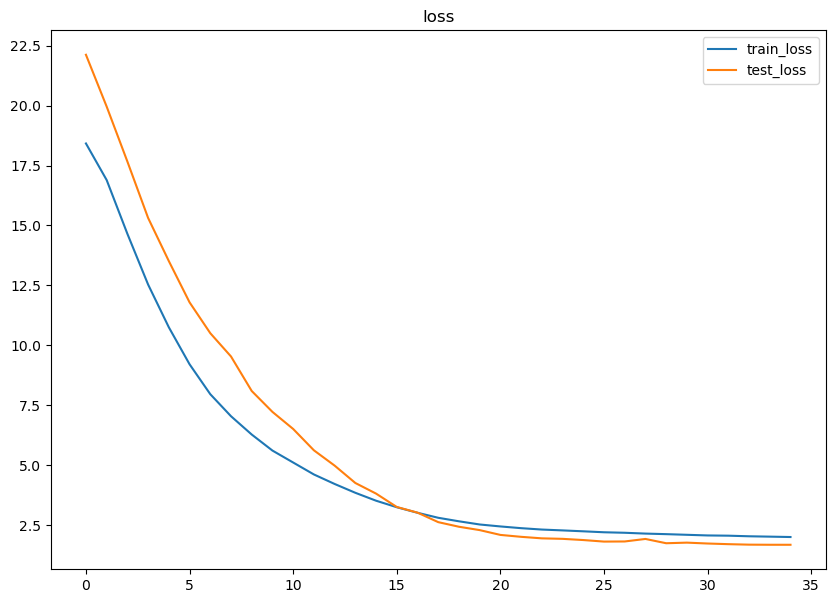

In [107]:
model0_results = train(model=model0, 
                       train_dataloader=train_dataloader, 
                       test_dataloader=test_dataloader, 
                       loss_fn=loss_fun, 
                       optimizer=optimizer, 
                       epochs=40, 
                       device=device)

plot_results_since(model0_results, 5)

#### model 1

In [115]:
class yachtModel1(nn.Module):
    def __init__(self, 
                 input_shape: int, 
                 hidden_units1: int, 
                 hidden_units2: int, 
                 output_shape: int): 
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Linear(in_features=input_shape, out_features= hidden_units2),
            nn.ReLU(), 
            nn.Linear(in_features=hidden_units2, out_features=hidden_units2),
            nn.ReLU(), 
            nn.Linear(in_features=hidden_units2, out_features=hidden_units1),
            nn.ReLU(), 
            nn.Linear(in_features=hidden_units1, out_features=output_shape)
        )
        
    def forward(self, x):
        return self.layer_stack(x) 
    
IN_FEATURES = len(indf.columns)
HIDDEN_UNITS1 = 64
HIDDEN_UNITS2 = 32
OUT_FEATURES = 1

torch.manual_seed(42) 
model1 = yachtModel1(input_shape=IN_FEATURES, 
                     hidden_units1=HIDDEN_UNITS1,
                     hidden_units2=HIDDEN_UNITS2,
                     output_shape=OUT_FEATURES).to(device)

loss_fun = nn.MSELoss()
optimizer = torch.optim.Adam(params=model1.parameters(),
                             lr=0.0001)

In [117]:
model1_results = train(model=model1, 
                       train_dataloader=train_dataloader, 
                       test_dataloader=test_dataloader, 
                       loss_fn=loss_fun, 
                       optimizer=optimizer, 
                       epochs=100, 
                       device=device)

plot_results_since(model1_results, 5)

  1%|          | 1/100 [00:02<03:18,  2.00s/it]

epoch: 0, train_loss: 1.9570, test_loss: 1.6619


  2%|▏         | 2/100 [00:04<03:28,  2.13s/it]

epoch: 1, train_loss: 1.9357, test_loss: 1.6588


  3%|▎         | 3/100 [00:06<03:18,  2.04s/it]

epoch: 2, train_loss: 1.9252, test_loss: 1.7022


  4%|▍         | 4/100 [00:08<03:14,  2.02s/it]

epoch: 3, train_loss: 1.9213, test_loss: 1.6324


  5%|▌         | 5/100 [00:10<03:25,  2.17s/it]

epoch: 4, train_loss: 1.9063, test_loss: 1.6552


  6%|▌         | 6/100 [00:13<03:34,  2.28s/it]

epoch: 5, train_loss: 1.8941, test_loss: 1.6252


  7%|▋         | 7/100 [00:15<03:40,  2.37s/it]

epoch: 6, train_loss: 1.8793, test_loss: 1.6897


  8%|▊         | 8/100 [00:18<03:41,  2.41s/it]

epoch: 7, train_loss: 1.8653, test_loss: 1.6345


  9%|▉         | 9/100 [00:20<03:45,  2.47s/it]

epoch: 8, train_loss: 1.8609, test_loss: 1.6008


 10%|█         | 10/100 [00:23<03:44,  2.50s/it]

epoch: 9, train_loss: 1.8523, test_loss: 1.5964


 11%|█         | 11/100 [00:25<03:43,  2.51s/it]

epoch: 10, train_loss: 1.8428, test_loss: 1.6031


 12%|█▏        | 12/100 [00:28<03:45,  2.56s/it]

epoch: 11, train_loss: 1.8204, test_loss: 1.5861


 13%|█▎        | 13/100 [00:31<03:45,  2.60s/it]

epoch: 12, train_loss: 1.8260, test_loss: 1.5865


 14%|█▍        | 14/100 [00:33<03:39,  2.55s/it]

epoch: 13, train_loss: 1.8181, test_loss: 1.5814


 15%|█▌        | 15/100 [00:36<03:35,  2.53s/it]

epoch: 14, train_loss: 1.8008, test_loss: 1.6170


 16%|█▌        | 16/100 [00:38<03:29,  2.50s/it]

epoch: 15, train_loss: 1.8148, test_loss: 1.6375


 17%|█▋        | 17/100 [00:41<03:27,  2.50s/it]

epoch: 16, train_loss: 1.7919, test_loss: 1.5851


 18%|█▊        | 18/100 [00:43<03:20,  2.45s/it]

epoch: 17, train_loss: 1.7821, test_loss: 1.5503


 19%|█▉        | 19/100 [00:45<03:18,  2.45s/it]

epoch: 18, train_loss: 1.7855, test_loss: 1.6802


 20%|██        | 20/100 [00:48<03:17,  2.47s/it]

epoch: 19, train_loss: 1.7722, test_loss: 1.5441


 21%|██        | 21/100 [00:50<03:17,  2.50s/it]

epoch: 20, train_loss: 1.7523, test_loss: 1.6240


 22%|██▏       | 22/100 [00:53<03:17,  2.53s/it]

epoch: 21, train_loss: 1.7492, test_loss: 1.5845


 23%|██▎       | 23/100 [00:55<03:11,  2.49s/it]

epoch: 22, train_loss: 1.7545, test_loss: 1.5316


 24%|██▍       | 24/100 [00:58<03:04,  2.43s/it]

epoch: 23, train_loss: 1.7422, test_loss: 1.6633


 25%|██▌       | 25/100 [01:00<03:05,  2.47s/it]

epoch: 24, train_loss: 1.7353, test_loss: 1.5483


 26%|██▌       | 26/100 [01:03<03:04,  2.50s/it]

epoch: 25, train_loss: 1.7243, test_loss: 1.5582


 27%|██▋       | 27/100 [01:05<03:01,  2.48s/it]

epoch: 26, train_loss: 1.7214, test_loss: 1.5127


 28%|██▊       | 28/100 [01:08<02:57,  2.46s/it]

epoch: 27, train_loss: 1.7182, test_loss: 1.5560


 29%|██▉       | 29/100 [01:10<02:52,  2.43s/it]

epoch: 28, train_loss: 1.7105, test_loss: 1.5420


 30%|███       | 30/100 [01:12<02:49,  2.42s/it]

epoch: 29, train_loss: 1.7020, test_loss: 1.5978


 31%|███       | 31/100 [01:15<02:48,  2.44s/it]

epoch: 30, train_loss: 1.6976, test_loss: 1.5082


 32%|███▏      | 32/100 [01:17<02:43,  2.40s/it]

epoch: 31, train_loss: 1.6962, test_loss: 1.5086


 33%|███▎      | 33/100 [01:20<02:41,  2.41s/it]

epoch: 32, train_loss: 1.6874, test_loss: 1.5081


 34%|███▍      | 34/100 [01:22<02:37,  2.38s/it]

epoch: 33, train_loss: 1.6829, test_loss: 1.5500


 35%|███▌      | 35/100 [01:24<02:36,  2.41s/it]

epoch: 34, train_loss: 1.6805, test_loss: 1.5336


 36%|███▌      | 36/100 [01:27<02:33,  2.40s/it]

epoch: 35, train_loss: 1.6788, test_loss: 1.4831


 37%|███▋      | 37/100 [01:29<02:33,  2.44s/it]

epoch: 36, train_loss: 1.6812, test_loss: 1.6709


 38%|███▊      | 38/100 [01:32<02:30,  2.43s/it]

epoch: 37, train_loss: 1.6638, test_loss: 1.5823


 39%|███▉      | 39/100 [01:34<02:25,  2.38s/it]

epoch: 38, train_loss: 1.6582, test_loss: 1.4719


 40%|████      | 40/100 [01:36<02:23,  2.40s/it]

epoch: 39, train_loss: 1.6513, test_loss: 1.5013


 41%|████      | 41/100 [01:39<02:21,  2.39s/it]

epoch: 40, train_loss: 1.6506, test_loss: 1.4736


 42%|████▏     | 42/100 [01:41<02:16,  2.35s/it]

epoch: 41, train_loss: 1.6512, test_loss: 1.4874


 43%|████▎     | 43/100 [01:44<02:15,  2.38s/it]

epoch: 42, train_loss: 1.6461, test_loss: 1.5409


 44%|████▍     | 44/100 [01:46<02:11,  2.34s/it]

epoch: 43, train_loss: 1.6486, test_loss: 1.4931


 45%|████▌     | 45/100 [01:48<02:07,  2.33s/it]

epoch: 44, train_loss: 1.6375, test_loss: 1.4828


 46%|████▌     | 46/100 [01:50<02:06,  2.35s/it]

epoch: 45, train_loss: 1.6441, test_loss: 1.4560


 47%|████▋     | 47/100 [01:53<02:07,  2.41s/it]

epoch: 46, train_loss: 1.6264, test_loss: 1.4616


 48%|████▊     | 48/100 [01:55<02:02,  2.35s/it]

epoch: 47, train_loss: 1.6331, test_loss: 1.4476


 49%|████▉     | 49/100 [01:58<01:58,  2.32s/it]

epoch: 48, train_loss: 1.6264, test_loss: 1.4774


 50%|█████     | 50/100 [02:00<01:58,  2.37s/it]

epoch: 49, train_loss: 1.6212, test_loss: 1.4499


 51%|█████     | 51/100 [02:02<01:56,  2.38s/it]

epoch: 50, train_loss: 1.6155, test_loss: 1.4948


 52%|█████▏    | 52/100 [02:05<01:55,  2.40s/it]

epoch: 51, train_loss: 1.6286, test_loss: 1.4618


 53%|█████▎    | 53/100 [02:07<01:52,  2.39s/it]

epoch: 52, train_loss: 1.6198, test_loss: 1.4952


 54%|█████▍    | 54/100 [02:10<01:48,  2.37s/it]

epoch: 53, train_loss: 1.6079, test_loss: 1.4663


 55%|█████▌    | 55/100 [02:12<01:45,  2.34s/it]

epoch: 54, train_loss: 1.6093, test_loss: 1.4329


 56%|█████▌    | 56/100 [02:14<01:41,  2.31s/it]

epoch: 55, train_loss: 1.6044, test_loss: 1.4572


 57%|█████▋    | 57/100 [02:16<01:40,  2.33s/it]

epoch: 56, train_loss: 1.6071, test_loss: 1.5187


 58%|█████▊    | 58/100 [02:19<01:37,  2.32s/it]

epoch: 57, train_loss: 1.5980, test_loss: 1.4401


 59%|█████▉    | 59/100 [02:21<01:35,  2.33s/it]

epoch: 58, train_loss: 1.5970, test_loss: 1.4802


 60%|██████    | 60/100 [02:24<01:34,  2.37s/it]

epoch: 59, train_loss: 1.5995, test_loss: 1.4679


 61%|██████    | 61/100 [02:26<01:31,  2.33s/it]

epoch: 60, train_loss: 1.5982, test_loss: 1.4273


 62%|██████▏   | 62/100 [02:28<01:28,  2.32s/it]

epoch: 61, train_loss: 1.5947, test_loss: 1.4707


 63%|██████▎   | 63/100 [02:31<01:27,  2.37s/it]

epoch: 62, train_loss: 1.5874, test_loss: 1.5310


 64%|██████▍   | 64/100 [02:33<01:24,  2.36s/it]

epoch: 63, train_loss: 1.5935, test_loss: 1.4219


 65%|██████▌   | 65/100 [02:35<01:22,  2.36s/it]

epoch: 64, train_loss: 1.5898, test_loss: 1.4186


 66%|██████▌   | 66/100 [02:37<01:18,  2.32s/it]

epoch: 65, train_loss: 1.5873, test_loss: 1.5359


 67%|██████▋   | 67/100 [02:40<01:17,  2.35s/it]

epoch: 66, train_loss: 1.5928, test_loss: 1.5482


 68%|██████▊   | 68/100 [02:42<01:16,  2.38s/it]

epoch: 67, train_loss: 1.5832, test_loss: 1.4285


 69%|██████▉   | 69/100 [02:45<01:13,  2.37s/it]

epoch: 68, train_loss: 1.5828, test_loss: 1.4372


 70%|███████   | 70/100 [02:47<01:11,  2.37s/it]

epoch: 69, train_loss: 1.5835, test_loss: 1.4132


 71%|███████   | 71/100 [02:49<01:08,  2.36s/it]

epoch: 70, train_loss: 1.5834, test_loss: 1.4713


 72%|███████▏  | 72/100 [02:52<01:06,  2.38s/it]

epoch: 71, train_loss: 1.5782, test_loss: 1.4602


 73%|███████▎  | 73/100 [02:54<01:03,  2.34s/it]

epoch: 72, train_loss: 1.5801, test_loss: 1.4114


 74%|███████▍  | 74/100 [02:56<01:00,  2.33s/it]

epoch: 73, train_loss: 1.5734, test_loss: 1.5110


 75%|███████▌  | 75/100 [02:59<00:57,  2.30s/it]

epoch: 74, train_loss: 1.5750, test_loss: 1.4499


 76%|███████▌  | 76/100 [03:01<00:55,  2.31s/it]

epoch: 75, train_loss: 1.5765, test_loss: 1.4624


 77%|███████▋  | 77/100 [03:03<00:53,  2.32s/it]

epoch: 76, train_loss: 1.5744, test_loss: 1.4892


 78%|███████▊  | 78/100 [03:06<00:50,  2.29s/it]

epoch: 77, train_loss: 1.5782, test_loss: 1.4299


 79%|███████▉  | 79/100 [03:08<00:48,  2.30s/it]

epoch: 78, train_loss: 1.5754, test_loss: 1.4360


 80%|████████  | 80/100 [03:10<00:45,  2.28s/it]

epoch: 79, train_loss: 1.5810, test_loss: 1.4568


 81%|████████  | 81/100 [03:12<00:43,  2.27s/it]

epoch: 80, train_loss: 1.5701, test_loss: 1.4209


 82%|████████▏ | 82/100 [03:15<00:41,  2.28s/it]

epoch: 81, train_loss: 1.5670, test_loss: 1.4067


 83%|████████▎ | 83/100 [03:17<00:39,  2.31s/it]

epoch: 82, train_loss: 1.5738, test_loss: 1.4631


 84%|████████▍ | 84/100 [03:19<00:37,  2.35s/it]

epoch: 83, train_loss: 1.5671, test_loss: 1.4156


 84%|████████▍ | 84/100 [03:20<00:38,  2.39s/it]


KeyboardInterrupt: 